In [1]:
# 1.读取数据与简单预处理
import pandas as pd
df = pd.read_excel('员工离职预测模型.xlsx')
df = df.replace({'工资': {'低': 0, '中': 1, '高': 2}})

# 2.提取特征变量和目标变量
X = df.drop(columns='离职') 
y = df['离职']

# 3.划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 4.模型训练及搭建
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=123)
model.fit(X_train, y_train)

C:\Users\22273\AppData\Local\Temp\ipykernel_30356\3859736924.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'工资': {'低': 0, '中': 1, '高': 2}})


DecisionTreeClassifier(max_depth=3, random_state=123)

In [2]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(model, X, y, cv=5)
acc

array([0.96666667, 0.96066667, 0.959     , 0.96233333, 0.91366667])

In [3]:
acc.mean()

0.9524666666666667

In [4]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
acc

array([0.97146884, 0.9674637 , 0.96641351, 0.97047305, 0.95030156])

In [5]:
acc.mean()

0.9652241309284616

In [6]:
from sklearn.model_selection import GridSearchCV  # 网格搜索合适的超参数

# 指定参数k的范围
parameters = {'max_depth': [3, 5, 7, 9, 11]}
# 构建决策树分类器
model = DecisionTreeClassifier()  # 这里因为要进行参数调优，所以不需要传入固定的参数了

# 网格搜索
grid_search = GridSearchCV(model, parameters, scoring='roc_auc', cv=5)   # cv=5表示交叉验证5次，默认值为3；scoring='roc_auc'表示通过ROC曲线的AUC值来进行评分，默认通过准确度评分
grid_search.fit(X_train, y_train) #传入训练集进行参数调优

# 输出参数的最优值
grid_search.best_params_

{'max_depth': 7}

In [7]:
import numpy as np
parameters = {'max_depth': np.arange(1, 10, 2)}

In [8]:
# 根据max_depth=7来重新搭建模型
model = DecisionTreeClassifier(max_depth=7)  # 这个max_depth参数是可以调节的，之后讲
model.fit(X_train, y_train) 

# 查看整体预测准确度
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.982


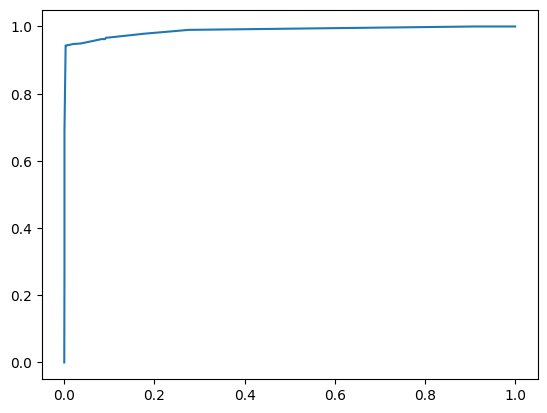

In [9]:
# 查看新的AUC值
# 预测不违约&违约概率
y_pred_proba = model.predict_proba(X_test)
y_pred_proba[:,1]  # 如果想单纯的查看违约概率，即查看y_pred_proba的第二列

# 绘制ROC曲线，计算AUC值
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

# 绘制ROC曲线
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [10]:
# 计算AUC值
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
print(score)

0.9878435524589015


In [11]:
# 查看此时的变量重要性
model.feature_importances_

array([0.00059222, 0.52690282, 0.13229671, 0.1116004 , 0.07731135,
       0.1512965 ])

In [12]:
# 一一对应
features = X.columns
importances = model.feature_importances_

# 通过表格形式显示
importances_df = pd.DataFrame()  # 创建空二维表格，为之后准备
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances

importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
1,满意度,0.526903
5,工龄,0.151297
2,考核得分,0.132297
3,工程数量,0.111600
4,月工时,0.077311
0,工资,0.000592


In [13]:
from sklearn.model_selection import GridSearchCV

# 指定决策树分类器中各个参数的范围
parameters = {'max_depth': [5, 7, 9, 11, 13], 'criterion':['gini', 'entropy'], 'min_samples_split':[5, 7, 9, 11, 13, 15]}
# 构建决策树分类器
model = DecisionTreeClassifier()  # 这里因为要进行参数调优，所以不需要传入固定的参数了

# 网格搜索
grid_search = GridSearchCV(model, parameters, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# 获得参数的最优值
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 13}

In [14]:
# 根据多参数调优的结果来重新搭建模型
model = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=13)
model.fit(X_train, y_train) 

# 查看整体预测准确度
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9823333333333333


In [15]:
# 查看新的AUC值
# 预测不违约&违约概率
y_pred_proba = model.predict_proba(X_test)
y_pred_proba[:,1]  # 如果想单纯的查看违约概率，即查看y_pred_proba的第二列

score = roc_auc_score(y_test, y_pred_proba[:,1])
print(score)

0.9880075960970136
